In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv(r"TrainingSet\statsTrainingSet.csv")
df_val = pd.read_csv(r"ValidationSet\statsValidationSet.csv")
df.describe()

,red,green,blue,black,white,doble
count,1670.000000,1670.000000,1670.000000,1.670000e+03,1670.000000,1670.00000
mean,7364.983832,180.904790,5809.972455,1.097006e+06,6370.252096,0.50000
std,15326.371316,5.960016,16618.782726,5.001132e+05,13707.746116,0.50015
min,9.000000,171.000000,1.000000,5.984380e+05,0.000000,0.00000
25%,17.000000,178.000000,2.000000,1.000612e+06,2038.250000,0.00000
50%,3039.000000,180.000000,2564.500000,1.010849e+06,3942.500000,0.50000
75%,8814.750000,182.000000,5768.500000,1.015484e+06,7185.500000,1.00000
max,312195.000000,256.000000,409136.000000,3.802182e+06,359856.000000,1.00000


In [4]:
#Normalization of the parameters
df = df.dropna(1)
red = df['red']
green = df['green']
blue = df['blue']
black = df['black']
white = df['white']

f = lambda x, y: x+y
red = f(red, green)
red = f(red, blue)
red = f(red, black)
red = f(red, white)

f = lambda x, y: (x/y)*100
df['%red'] = f(df['red'],red)
df['%green'] = f(df['green'],red)
df['%blue'] = f(df['blue'],red)
df['%black'] = f(df['black'],red)
df['%white'] = f(df['white'],red)

#New features
f = lambda x, y: x/y
df['prop_blue_red'] = f(df['%blue'], df['%red'])
df['prop_white_red'] = f(df['%white'], df['%red'])

#Same process with the validation set
df_val = df_val.dropna(1)
red = df_val['red']
green = df_val['green']
blue = df_val['blue']
black = df_val['black']
white = df_val['white']

f = lambda x, y: x+y
red = f(red, green)
red = f(red, blue)
red = f(red, black)
red = f(red, white)

f = lambda x, y: (x/y)*100
df_val['%red'] = f(df_val['red'],red)
df_val['%green'] = f(df_val['green'],red)
df_val['%blue'] = f(df_val['blue'],red)
df_val['%black'] = f(df_val['black'],red)
df_val['%white'] = f(df_val['white'],red)
f = lambda x, y: x/y
df_val['prop_blue_red'] = f(df_val['%blue'], df_val['%red'])
df_val['prop_white_red'] = f(df_val['%white'], df_val['%red'])
df_val.describe()

,red,green,blue,black,white,doble,%red,%green,%blue,%black,%white,prop_blue_red,prop_white_red
count,558.000000,558.000000,558.000000,5.580000e+02,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,9389.928315,181.440860,5275.862007,1.099599e+06,7064.492832,0.500000,0.784590,0.017277,0.414099,98.172044,0.611990,0.768355,150.237490
std,34118.898666,8.804841,17805.532958,5.047607e+05,16550.710067,0.500449,1.569617,0.002489,0.788365,2.569937,0.760481,1.624667,299.381955
min,10.000000,169.000000,1.000000,7.946780e+05,0.000000,0.000000,0.000982,0.004741,0.000098,61.330793,0.000000,0.031013,0.000000
25%,17.000000,178.000000,2.000000,1.000102e+06,2375.250000,0.000000,0.001669,0.017380,0.000196,97.719417,0.218571,0.080845,0.374349
50%,2802.000000,180.000000,1989.000000,1.011029e+06,4581.500000,0.500000,0.264551,0.017575,0.190127,98.962819,0.437253,0.345609,0.898595
75%,10524.750000,182.000000,5258.250000,1.015110e+06,7891.250000,1.000000,0.932517,0.017770,0.474155,99.457430,0.739096,0.834794,192.882212
max,742601.000000,296.000000,375160.000000,3.808400e+06,358238.000000,1.000000,19.451401,0.029060,9.826795,99.974474,9.383546,20.352296,2453.833333


In [5]:
#Elimination of useles features
df.pop('id')
df.pop('red')
df.pop('green')
df.pop('blue')
df.pop('black')
df.pop('white')
df.pop('%black')
df.pop('%green')

df_val.pop('id')
df_val.pop('red')
df_val.pop('green')
df_val.pop('blue')
df_val.pop('black')
df_val.pop('white')
df_val.pop('%black')
df_val.pop('%green')

0      0.018258
1      0.017475
2      0.017673
3      0.017770
4      0.017477
5      0.017377
6      0.017868
7      0.020421
8      0.017965
9      0.017475
10     0.017575
11     0.017770
12     0.004846
13     0.017770
14     0.017380
15     0.017475
16     0.017770
17     0.017770
18     0.004951
19     0.017475
20     0.017575
21     0.017279
22     0.017770
23     0.017377
24     0.017965
25     0.017770
26     0.017477
27     0.017770
28     0.018258
29     0.017770
         ...   
528    0.017868
529    0.019635
530    0.017575
531    0.017377
532    0.017282
533    0.017574
534    0.017575
535    0.017574
536    0.017575
537    0.017574
538    0.017673
539    0.017770
540    0.018258
541    0.017181
542    0.017770
543    0.017279
544    0.017770
545    0.017574
546    0.018161
547    0.017574
548    0.017184
549    0.017475
550    0.017770
551    0.017770
552    0.018649
553    0.020322
554    0.017575
555    0.017377
556    0.019918
557    0.017279
Name: %green, Length: 55

In [6]:
df.describe()

,doble,%red,%blue,%white,prop_blue_red,prop_white_red
count,1670.00000,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000
mean,0.50000,0.653994,0.510637,0.586581,5.292106,159.993363
std,0.50015,1.284732,1.526787,1.297336,172.656335,859.331462
min,0.00000,0.000884,0.000098,0.000000,0.009442,0.000000
25%,0.00000,0.001669,0.000196,0.195272,0.091003,0.385927
50%,0.50000,0.286568,0.245413,0.371995,0.412807,0.882192
75%,1.00000,0.772857,0.521144,0.671852,0.930073,148.328125
max,1.00000,30.650083,40.167371,35.329253,7055.545455,23990.400000


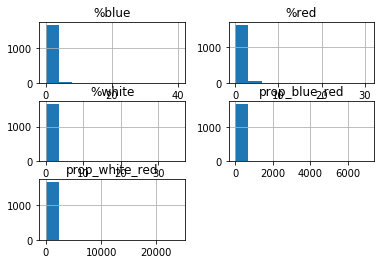

In [7]:
#Show the distribution of each feature
df.drop(['doble'],1).hist()
plt.show()

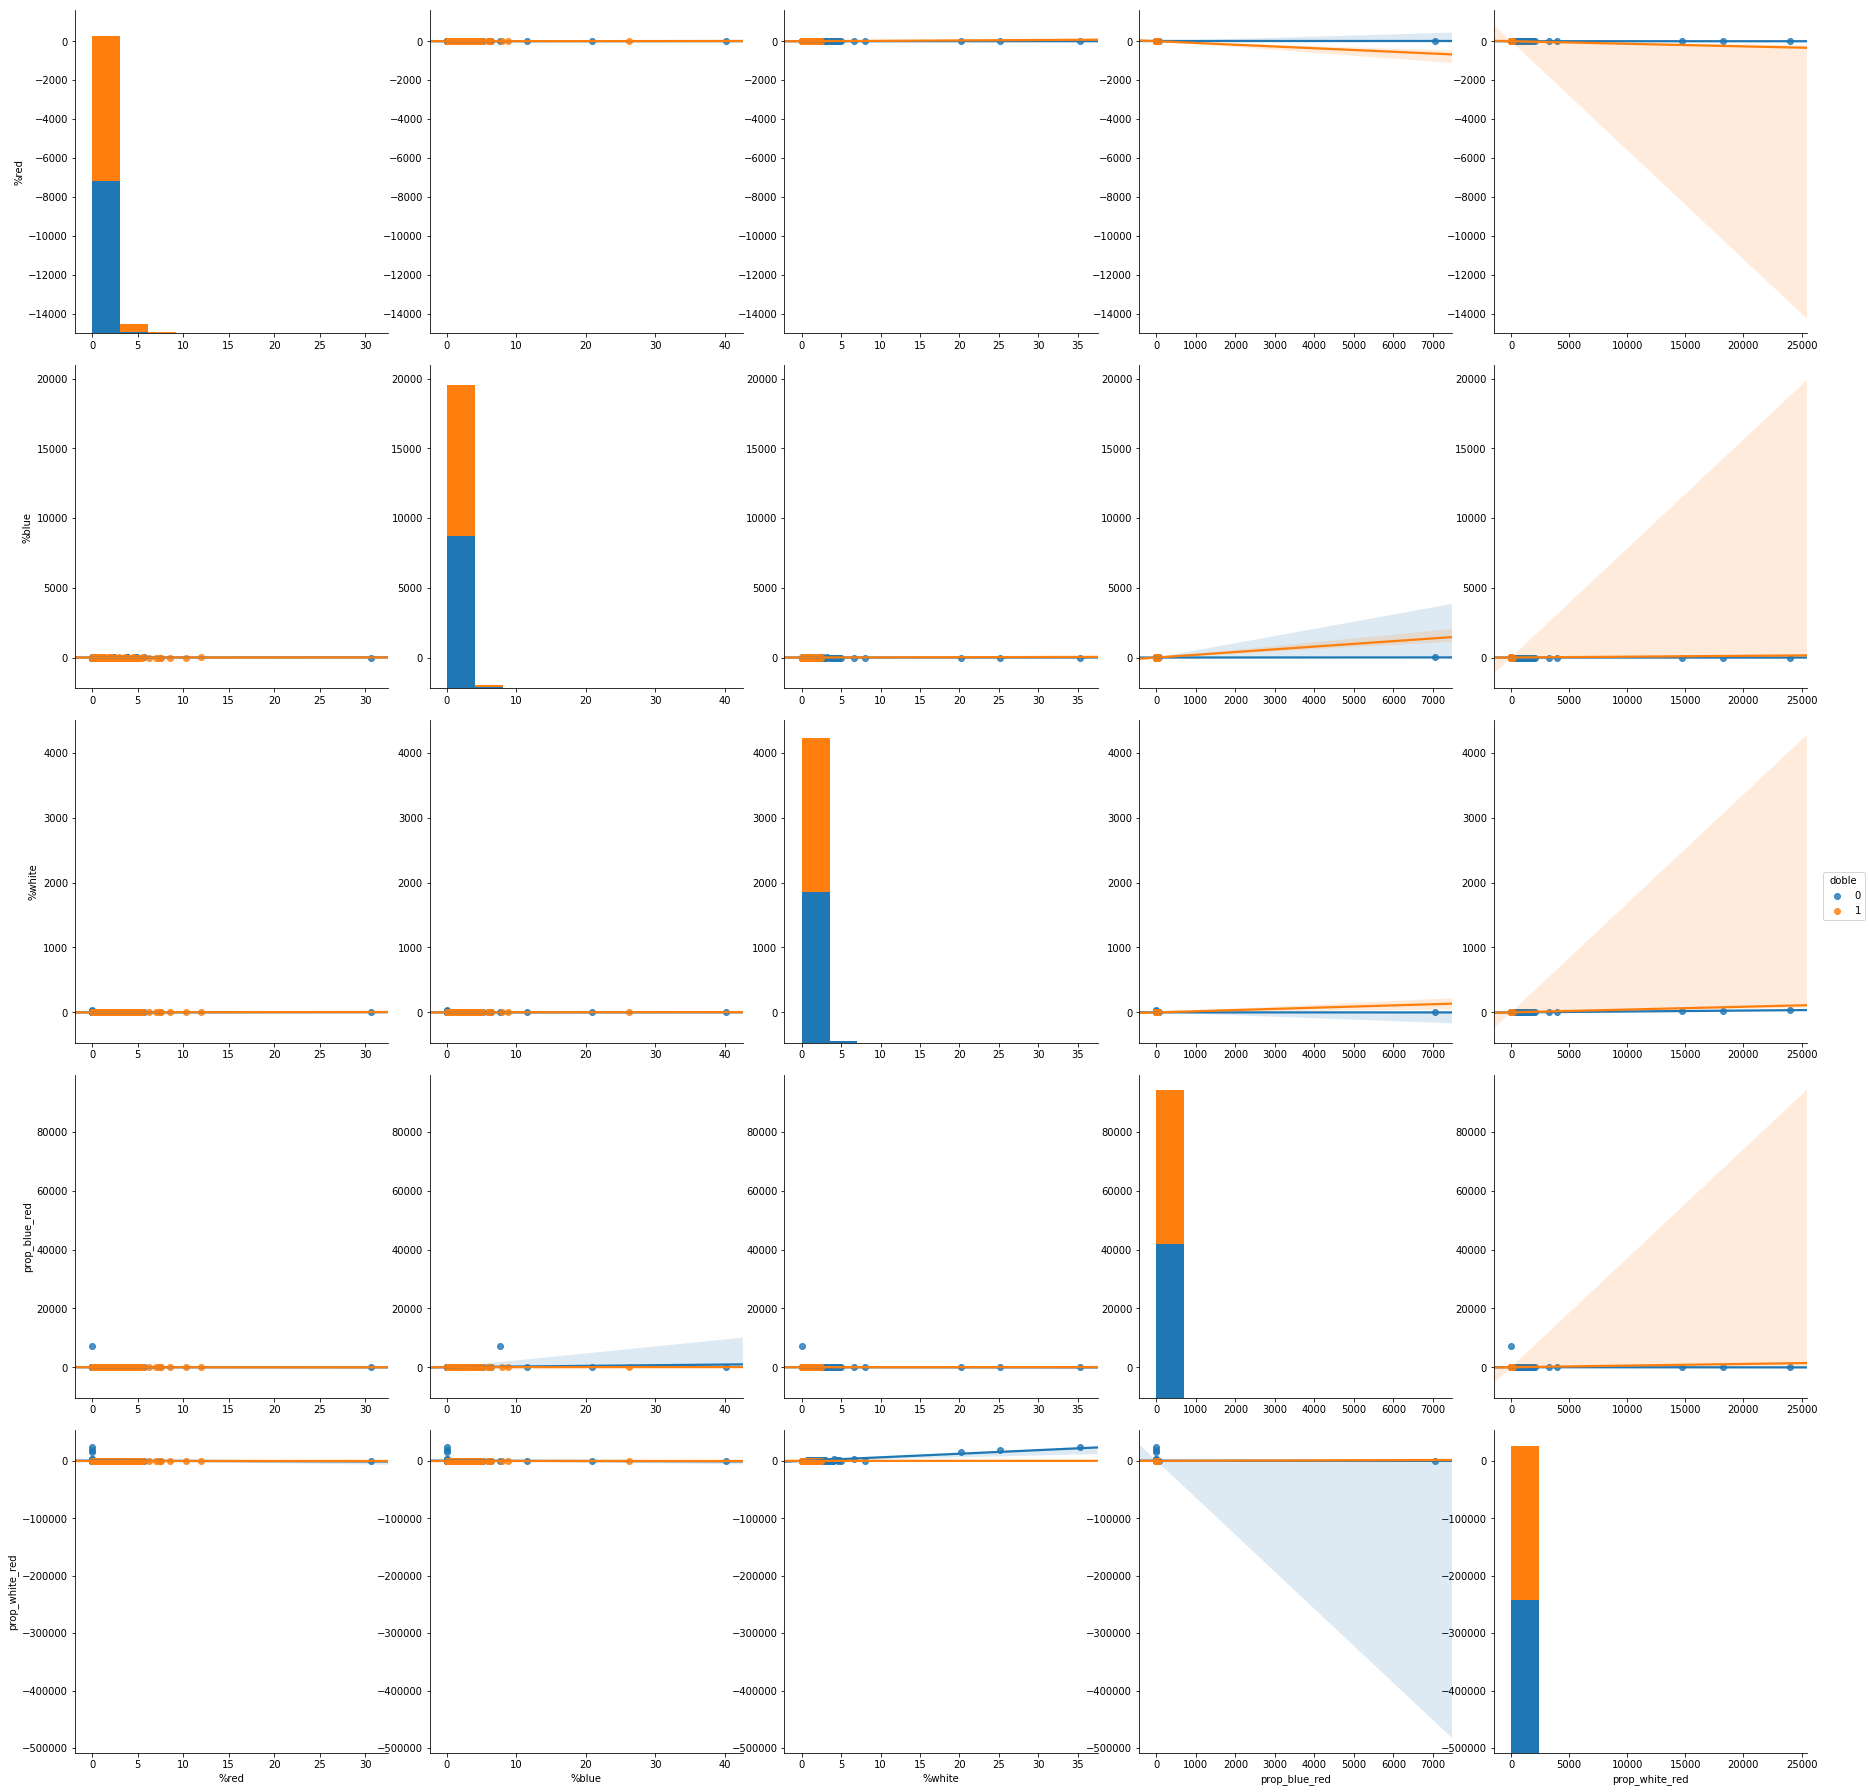

In [8]:
#Show the correlation of every pair of features
sb.pairplot(df.dropna(), hue='doble',size=5,vars=["%red","%blue","%white","prop_blue_red","prop_white_red"],kind='reg')

In [9]:
#df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#df.describe()

In [10]:
#Creation of the model
X = np.array(df.drop(['doble'],1))
y = np.array(df['doble'])

X_val = np.array(df_val.drop(['doble'],1))
y_val = np.array(df_val['doble'])
model = linear_model.LogisticRegression(C=0.01)
model.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
#Store the model and print the confusion matrix
joblib.dump(model, 'model.pkl')
y_pred = model.predict(X_val)
cm = metrics.confusion_matrix(y_val, y_pred)
print(cm)

[[232  47]
 [  0 279]]


In [12]:
#Show accuracy
print(metrics.accuracy_score(y_val, y_pred))

0.915770609319


In [13]:
#Show all the measures
print(metrics.classification_report(y_val, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91       279
          1       0.86      1.00      0.92       279

avg / total       0.93      0.92      0.92       558

